In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Cyclone_Wildfire_Flood_Earthquake_Database.zip"

Archive:  /content/drive/MyDrive/Cyclone_Wildfire_Flood_Earthquake_Database.zip
   creating: Cyclone_Wildfire_Flood_Earthquake_Database/
   creating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/0.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/1.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/10.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/100.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/101.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/102.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/103.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/104.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/105.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/106.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone

In [ ]:
! pip install python_splitter 
import python_splitter
python_splitter.split_from_folder("/content/Cyclone_Wildfire_Flood_Earthquake_Database", train=0.8, test=0.2)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
✅Checking SOURCE directory...
0.8 0 0.2
✅Checking percentage validation...
✅Making required directories...
✅Shuffling data...
✅Getting ready for copying files...

-------------Successfully splitted !!!--------------- 


In [ ]:
import os
import matplotlib.pyplot as plt
import glob
from skimage import io
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D,MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import pandas as pd
import tensorflow as tf
import keras

In [ ]:

train_dir='/content/Train_Test_Folder/train'
test_dir='/content/Train_Test_Folder/test'

In [ ]:
test_list=os.listdir(test_dir) 
print("Length of testing list is",len(test_list) ) 
train_list=os.listdir(train_dir)
print("Length of training list is",len(train_list))

#SORTING THEM FOR REFERENCE
train_list.sort()
test_list.sort()
#viewing items
#test_list[0:5]

print("The training list is : ",train_list)

Length of testing list is 4
Length of training list is 4
The training list is :  ['Cyclone', 'Earthquake', 'Flood', 'Wildfire']


In [ ]:
train_list_mod=['Cyclone', 'Earthquake', 'Flood', 'Wildfire']
print(train_list_mod)

['Cyclone', 'Earthquake', 'Flood', 'Wildfire']


In [ ]:
def data_dictionary():
    path_train=train_dir
    path_test=test_dir
    list_train= train_list   #os.listdir(path_train) 
    train_dictionary={"image_path":[],"target":[]}
    test_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        path_disaster_train=path_train+"/"+i
        path_disaster_test=path_test+"/"+i
        image_list_train=os.listdir(path_disaster_train)
        image_list_test=os.listdir(path_disaster_test)
        for j in image_list_train:
            img_path_train=path_disaster_train+"/"+j
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(k) 
        for m in image_list_test :
            img_path_test=path_disaster_test+"/"+m
            test_dictionary["image_path"].append(img_path_test)
            test_dictionary['target'].append(k)
        k+=1 
    test_df=pd.DataFrame(test_dictionary)
    train_df=pd.DataFrame(train_dictionary)
    # print(test_df.head(5))
    # print(train_df.head(5))
        
    return  train_df,test_df

(1080, 1920, 3)
(650, 975, 3)
(506, 900, 3)
(360, 480, 3)


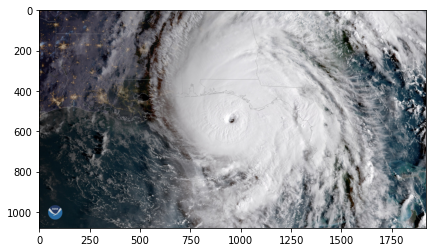

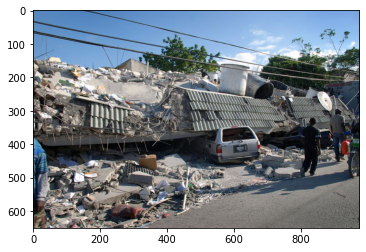

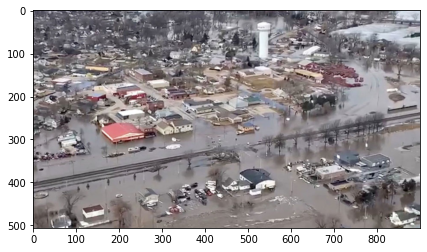

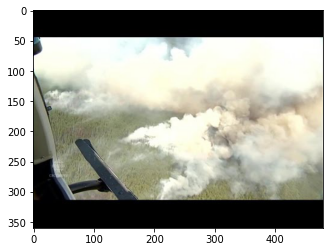

In [ ]:
# Plotting images 
for disaster_class in train_list_mod:  

    disaster_path = os.path.join(train_dir, disaster_class, '*')
    disaster_path = glob.glob(disaster_path)  
    
    # accessing an image file from the dataset classes
    image = io.imread(disaster_path[1])  

    # plotting the original image
    i, (im1) = plt.subplots(1)
    i.set_figwidth(15)
    im1.imshow(image)
    print(image.shape)

In [ ]:
def load_data(input_size=(240,240)):
    images=[]
    images2=[]
    train_df,test_df=data_dictionary()
    for i in train_df['image_path']:
        img=cv2.imread(i)
        img=cv2.resize(img,input_size)
        images.append(img)
    y_train=np.asarray(train_df['target'])
    x_train=np.asarray(images)
    for i in test_df['image_path']:
        img=cv2.imread(i)
        img=cv2.resize(img,input_size)
        images2.append(img)
    y_test=np.asarray(test_df['target'])
    x_test=np.asarray(images2)
    return x_train,x_test,y_train,y_test



In [ ]:
x_train,x_test,y_train,y_test=load_data(input_size=(240,240))

In [ ]:
from tensorflow.keras.applications import  VGG19
from tensorflow.keras.models import Model
from keras.applications.vgg19 import preprocess_input


In [ ]:
vgg19 = VGG19(include_top=False,weights='imagenet')

80134624/80134624 [==============================] - 4s 0us/step


In [ ]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
train_img=preprocess_input(x_train)
test_img=preprocess_input(x_test)
num_train=x_train.shape[0]
num_test=x_test.shape[0]

In [ ]:
features_train=vgg19.predict(train_img)

111/111 [==============================] - 30s 174ms/step


In [ ]:
features_test=vgg19.predict(test_img)

28/28 [==============================] - 7s 248ms/step


In [ ]:
features_train.shape

(3541, 7, 7, 512)

In [ ]:
features_test.shape

(887, 7, 7, 512)

In [ ]:
num_train=x_train.shape[0]
num_test=x_test.shape[0]

In [ ]:
print(num_train,num_test)

3541 887


In [ ]:
x_train=features_train.reshape(num_train,25088)
x_test=features_test.reshape(num_test,25088)

In [ ]:
model1=Sequential([ Dense(1024,activation='relu'),
                   Dense(512,activation='relu'),
                  Dense(256,activation='relu'),
                  Dense(128,activation='relu'),
                  Dense(4,activation='softmax')])

In [ ]:
model1.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'] )

In [ ]:
history=model1.fit(x_train,y_train,batch_size=10,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
355/355 [==============================] - 7s 9ms/step - loss: 1.2168 - accuracy: 0.8797 - val_loss: 0.4779 - val_accuracy: 0.9380
Epoch 2/10
355/355 [==============================] - 3s 8ms/step - loss: 0.2367 - accuracy: 0.9582 - val_loss: 0.4440 - val_accuracy: 0.9053
Epoch 3/10
355/355 [==============================] - 3s 9ms/step - loss: 0.1505 - accuracy: 0.9715 - val_loss: 0.6050 - val_accuracy: 0.9301
Epoch 4/10
355/355 [==============================] - 3s 9ms/step - loss: 0.0981 - accuracy: 0.9862 - val_loss: 0.4323 - val_accuracy: 0.9425
Epoch 5/10
355/355 [==============================] - 3s 8ms/step - loss: 0.1111 - accuracy: 0.9836 - val_loss: 0.6520 - val_accuracy: 0.9448
Epoch 6/10
355/355 [==============================] - 3s 8ms/step - loss: 0.1875 - accuracy: 0.9833 - val_loss: 0.9939 - val_accuracy: 0.9346
Epoch 7/10
355/355 [==============================] - 3s 9ms/step - loss: 0.0625 - accuracy: 0.9898 - val_loss: 0.6829 - val_accuracy: 0.9290
Epoch 

In [ ]:
from sklearn.metrics import classification_report
predictions = model1.predict(x_test, batch_size=10)
print(classification_report(y_test,
	predictions.argmax(axis=1), target_names=train_list_mod))

89/89 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

     Cyclone       0.97      0.96      0.96       186
  Earthquake       0.94      0.94      0.94       270
       Flood       0.90      0.93      0.92       215
    Wildfire       0.96      0.94      0.95       216

    accuracy                           0.94       887
   macro avg       0.94      0.94      0.94       887
weighted avg       0.94      0.94      0.94       887



In [ ]:
# construct a plot that plots and saves the training history
plt.style.use("ggplot")
plt.figure()
plt.plot(model1.history.history['loss'], label="train_loss")
plt.plot(model1.history.history["val_loss"], label="val_loss")
#plt.plot(model.history.history["accuracy"], label="train_acc")
#plt.plot(model.history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")



In [ ]:
plt.plot(model1.history.history['accuracy'],label="train_accuracy")
plt.plot(model1.history.history['val_accuracy'],label="validation_accuracy")
plt.legend()
plt.show()


In [ ]:
    
def load_img(img_path):
    images=[]
    img=cv2.imread(img_path)
    img=cv2.resize(img,(240,240))
    images.append(img)
    x_test=np.asarray(images)
    test_img=preprocess_input(x_test)
    features_test=vgg19.predict(test_img)
    num_test=x_test.shape[0]
    f_img=features_test.reshape(num_test,25088)
    
    return f_img
    

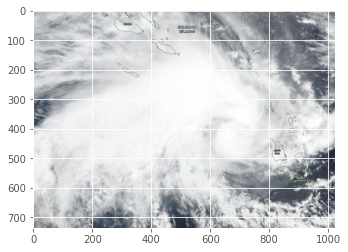

In [ ]:
img=Image.open("/content/Train_Test_Folder/test/Cyclone/102.jpg")
plt.imshow(img)

In [ ]:
img1=load_img("/content/Train_Test_Folder/test/Cyclone/102.jpg")

1/1 [==============================] - 1s 879ms/step


In [ ]:
np.argmax(model1.predict(img1))

1/1 [==============================] - 0s 20ms/step


0

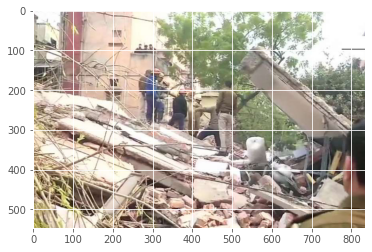

In [ ]:
img=Image.open("/content/Train_Test_Folder/test/Earthquake/1006.jpg")
plt.imshow(img)

In [ ]:
img2=load_img("/content/Train_Test_Folder/test/Earthquake/1006.jpg")

1/1 [==============================] - 0s 103ms/step


In [ ]:
np.argmax(model1.predict(img2))

1/1 [==============================] - 0s 20ms/step


1

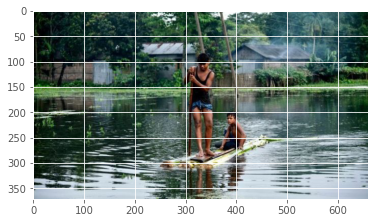

In [ ]:
img=Image.open("/content/Train_Test_Folder/test/Flood/1005.jpg")
plt.imshow(img)

In [ ]:
img3=load_img("/content/Train_Test_Folder/test/Flood/1005.jpg")

1/1 [==============================] - 0s 21ms/step


In [ ]:
np.argmax(model1.predict(img3))

1/1 [==============================] - 0s 27ms/step


2

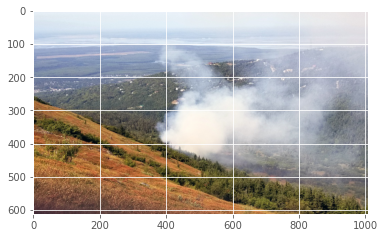

In [ ]:
img=Image.open("/content/Train_Test_Folder/test/Wildfire/1000.jpg")
plt.imshow(img)

In [ ]:
img4=load_img("/content/Train_Test_Folder/test/Wildfire/1000.jpg")

1/1 [==============================] - 0s 30ms/step


In [ ]:
np.argmax(model1.predict(img4))

1/1 [==============================] - 0s 22ms/step


3

In [ ]:
def disaster_basic(image_list):
  train_list_mod=['Cyclone', 'Earthquake', 'Flood', 'Wildfire']
  for images in image_list:
    pred=np.argmax(model1.predict(images))
    print("Image is of",train_list_mod[pred])

In [ ]:
image_list=[img1,img2,img3,img4]
disaster_basic(image_list)

1/1 [==============================] - 0s 21ms/step
Image is of Cyclone
1/1 [==============================] - 0s 20ms/step
Image is of Earthquake
1/1 [==============================] - 0s 22ms/step
Image is of Flood
1/1 [==============================] - 0s 25ms/step
Image is of Wildfire


In [ ]:
tf.keras.models.save_model(model1,'my_model.hdf5')

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 101.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 87.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.5 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=76f3773d13a7f92551593e3f525efe2a3672fd1799b

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st
from tensorflow.keras.applications import  VGG19
from keras.applications.vgg19 import preprocess_input

vgg19 = VGG19(include_top=False,weights='imagenet')



@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/my_model.hdf5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Disaster Classification
         """
         )

file = st.file_uploader("Please upload an disaster image", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)


def import_and_predict(image_data, model):
    
        size = (240,240)    
        image = ImageOps.fit(image_data,size,Image.ANTIALIAS)
        image = np.asarray(image)
        
        
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.
        
        img_reshape = img[np.newaxis,...]
        
        test_img=preprocess_input(img_reshape)
        num_test=img_reshape.shape[0]
        features_test=vgg19.predict(test_img)
        f_img=features_test.reshape(num_test,25088)
        
        prediction = model.predict(f_img)
        
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    st.write(predictions)
    train_list_mod=['Cyclone', 'Earthquake', 'Flood', 'Wildfire']
    st.write(score)
    st.success(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(train_list_mod[np.argmax(score)], 100 * np.max(score))
    )

Overwriting app.py


In [ ]:
!pip install pyngrok==4.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!ngrok authtoken 2MarH1nDTUG9jk4yGunt2mMTIoa_3frKugaF18Ki3ice7vuto

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

In [ ]:
!nohup streamlit run app.py --server.enableCORS=false &

In [ ]:
!nohup streamlit run app.py --server.enableWebsocketCompression=false &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port=8501)
url

'http://d0ab-34-124-246-116.ngrok.io'

In [ ]:
!cat /content/nohup.out

2023-03-05 13:51:34.868 
As a result, 'server.enableCORS' is being overridden to 'true'.

More information:
In order to protect against CSRF attacks, we send a cookie with each request.
To do so, we must specify allowable origins, which places a restriction on
cross-origin resource sharing.

If cross origin resource sharing is required, please disable server.enableXsrfProtection.
            



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.124.246.116:8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8502
  External URL: http://34.124.246.116:8502

